In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [5]:
file_path = "/Users/sultan/Documents/meh/Stock Market project/portfolio_data.csv"  
df = pd.read_csv(file_path)

In [7]:
df.head()

,Date,AMZN,DPZ,BTC,NFLX
0,5/1/2013,248.229996,51.190983,106.250000,30.415714
1,5/2/2013,252.550003,51.987320,98.099998,30.641428
2,5/3/2013,258.049988,52.446388,112.900002,30.492857
3,5/6/2013,255.720001,53.205257,109.599998,30.098572
4,5/7/2013,257.730011,54.151505,113.199997,29.464285


In [9]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

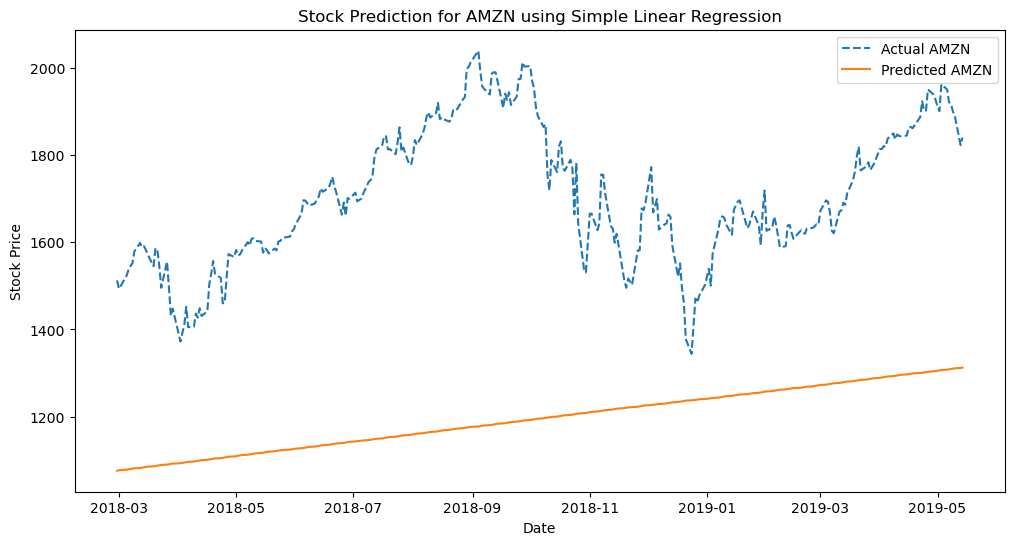

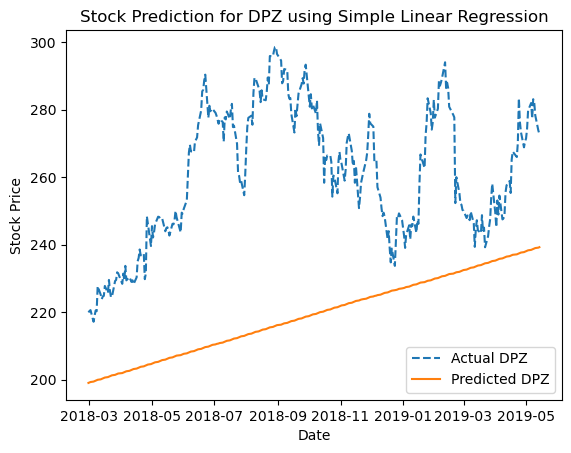

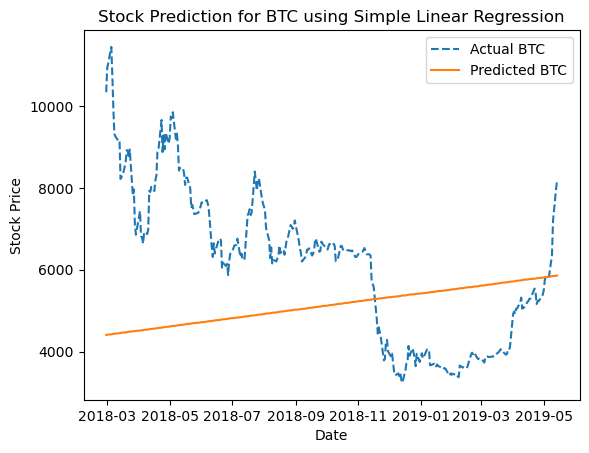

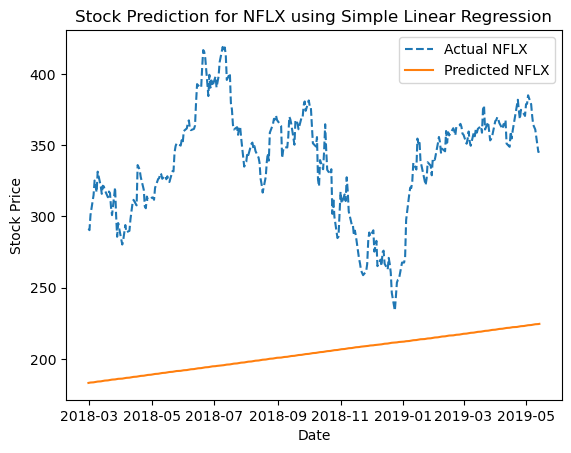

In [19]:
# Create training features (X) as index numbers (time steps)
X = np.arange(len(df)).reshape(-1, 1)

# Train-test split (80% train, 20% test)
split = int(len(df) * 0.8)
X_train, X_test = X[:split], X[split:] 
y_train, y_test = df.iloc[:split], df.iloc[split:]

# Train a separate Linear Regression model for each stock
predictions = {}
for stock in df.columns:
    model = LinearRegression()
    model.fit(X_train, y_train[stock])  # Train model
    y_pred = model.predict(X_test)  # Predict stock prices
    predictions[stock] = y_pred

# Plot predictions
plt.figure(figsize=(12, 6))
for stock in df.columns:
    plt.plot(df.index[split:], y_test[stock], label=f"Actual {stock}", linestyle="dashed")
    plt.plot(df.index[split:], predictions[stock], label=f"Predicted {stock}")
    plt.xlabel("Date")
    plt.ylabel("Stock Price")
    plt.title(f"Stock Prediction for {stock} using Simple Linear Regression")
    plt.legend()
    plt.show()

In [23]:
# Print the stock price status
print("\nStock Price Prediction Status:")
for stock in df.columns:
    actual_last_price = y_test[stock].iloc[-1]  # Last actual stock price
    predicted_last_price = predictions[stock][-1]  # Last predicted stock price
    
    status = "INCREASING " if predicted_last_price > actual_last_price else "DECREASING "
    
    print(f"{stock}: Last Actual Price = {actual_last_price:.2f}, Last Predicted Price = {predicted_last_price:.2f} → {status}")



Stock Price Prediction Status:
AMZN: Last Actual Price = 1840.12, Last Predicted Price = 1312.28 → DECREASING 
DPZ: Last Actual Price = 272.86, Last Predicted Price = 239.27 → DECREASING 
BTC: Last Actual Price = 8183.83, Last Predicted Price = 5856.21 → DECREASING 
NFLX: Last Actual Price = 345.61, Last Predicted Price = 224.64 → DECREASING 
